# Homework 1 - Aprendizagem

>Teresa Matos- ist1106009   
>Francisco Morão - ist1106067   
>Grupo 46   

## II. Programming

Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to
classify 768 patients into 2 classes (normal, diabetes).

1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a
single input variable. Using f_classif from sklearn, identify the input variables with the
worst and best discriminative power. Plot their class-conditional probability density
functions.


Best Feature: Glucose
Worst Feature: BloodPressure


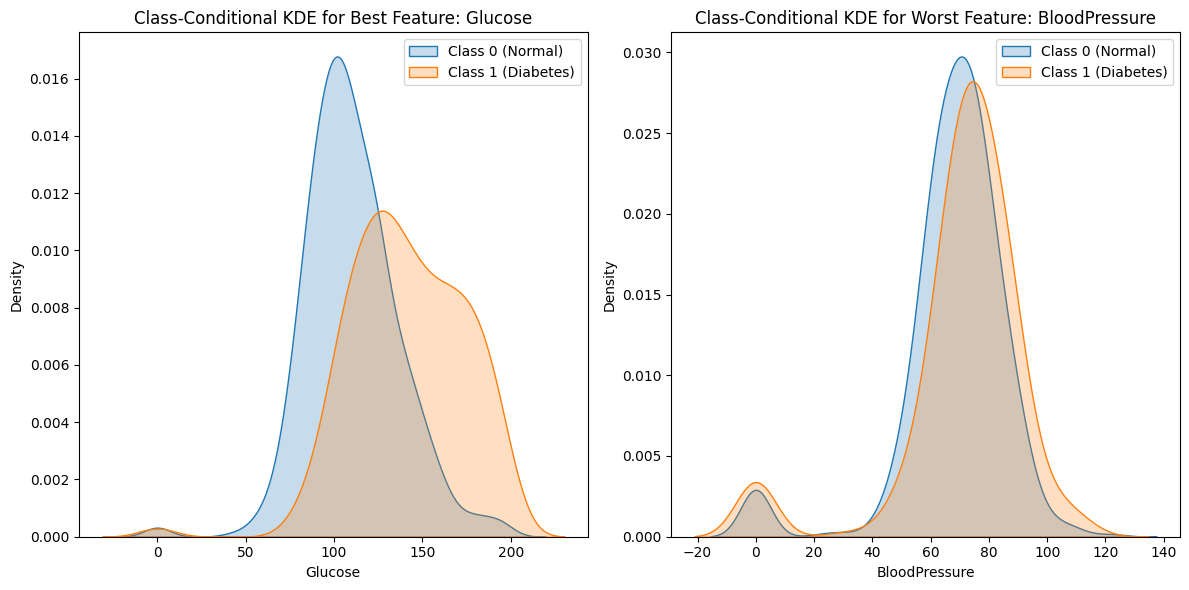

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

df['Outcome'] = df['Outcome'].astype(int)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)


best_feature = anova_results.iloc[0]['Feature']
worst_feature = anova_results.iloc[-1]['Feature']
print(f"Best Feature: {best_feature}")
print(f"Worst Feature: {worst_feature}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) #Best
sns.kdeplot(df[best_feature][df['Outcome'] == 0], label='Class 0 (Normal)', fill=True)
sns.kdeplot(df[best_feature][df['Outcome'] == 1], label='Class 1 (Diabetes)', fill=True)
plt.title(f'Class-Conditional KDE for Best Feature: {best_feature}')
plt.xlabel(best_feature)
plt.legend()

plt.subplot(1, 2, 2) #Worst
sns.kdeplot(df[worst_feature][df['Outcome'] == 0], label='Class 0 (Normal)', fill=True)
sns.kdeplot(df[worst_feature][df['Outcome'] == 1], label='Class 1 (Diabetes)', fill=True)
plt.title(f'Class-Conditional KDE for Worst Feature: {worst_feature}')
plt.xlabel(worst_feature)
plt.legend()

plt.tight_layout()
plt.show()

2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess
in a single plot both the training and testing accuracies of a decision tree with minimum
sample split in {2, 5,10, 20, 30, 50, 100} and the remaining parameters as default.

[optional] Note that split thresholding of numeric variables in decision trees is nondeterministic in sklearn, hence you may opt to average the results using 10 runs per
parameterization.


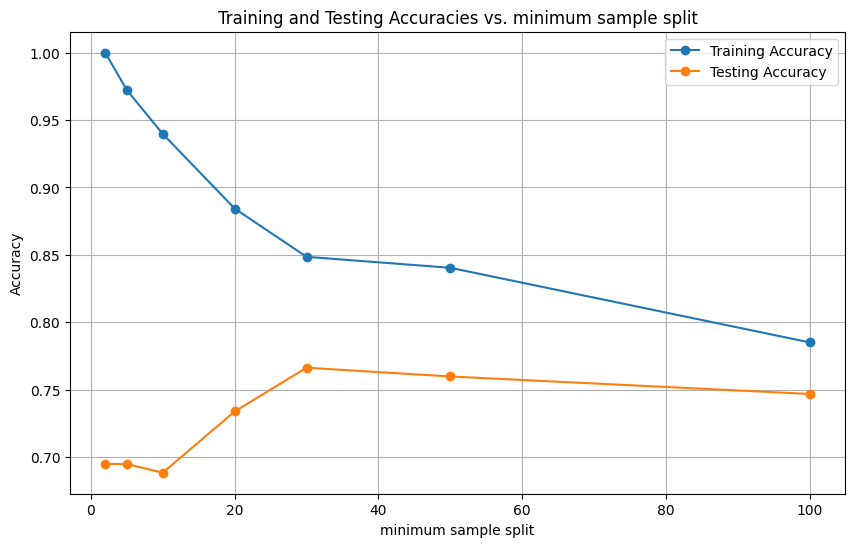

In [2]:
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

df['Outcome'] = df['Outcome'].astype(int)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
train_accuracies = []
test_accuracies = []

for min_samples in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples, random_state=1)
    
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')

plt.xlabel('minimum sample split')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. minimum sample split')
plt.legend()

plt.grid(True)
plt.show()


3) [2v] Critically analyze these results, including the generalization capacity across settings.

À medida que o **minimum sample split (mss)** aumenta, a Accuracy de treino diminui. No entanto, isto é de esperar, pelo simples facto de o modelo se tornar cada vez mais complexo, o que resulta num ajuste menos rigoroso aos dados de treino. Por outro lado, com um **mss** mais baixo o modelo sobrestima os dados de treino (alcança Accuracies muito elavadas), uma vez que, falha a generalização corretamente para os dados de teste (Accuracies muito baixas), indicando **overfitting**.

Conforme o valor do **minimum sample split** aumenta (por volta de 30), a Accuracy de teste sobe e estabiliza-se, indicando que o modelo ja esta menos propisio a **overfitting** e que tem melhor capacidade de generalização. Contudo, valores muito altos (como 100) reduzem tanto a Accuracy de treino como as do teste, o que pode indicar um modelo **underfitting**, ou seja, um modelo muito simplificado para capturar adequadamente as relações dos dados.

Existe então um equilibrio entre **overfitting** e **underfitting**. Quando **mss** esta entre os valores 20 e 30, por exemplo, leva a uma melhor capacidade de generalização.

4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree
(random_state=1) using all available data and ensuring that the maximum depth would be 3
in order to avoid overfitting risks.

    i. Plot the decision tree.

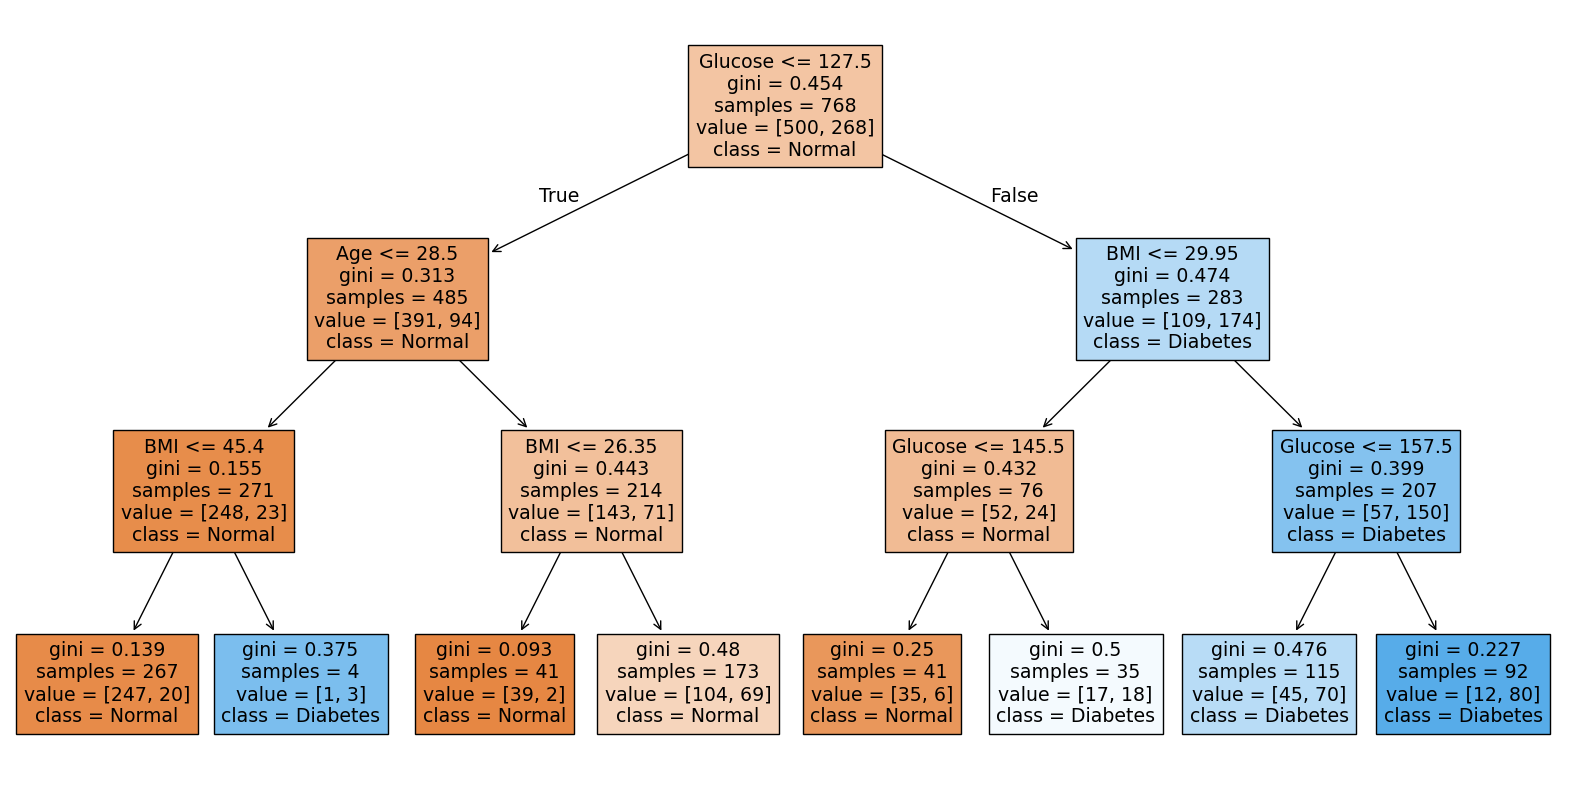

In [3]:
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

df['Outcome'] = df['Outcome'].astype(int)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True)
plt.show()

II. Explain what characterizes diabetes by identifying the conditional associations
together with their posterior probabilities.

*__Conditional associations:__*

(Glucose > 127.5 ∧ BMI > 29.25 ∧ Glucose > 157.5 ) <br>
&nbsp;    ∨ (Glucose > 127.5 ∧ BMI > 29.25 ∧ Glucose ≤ 157.5) <br>
&nbsp;    ∨ (Glucose > 127.5 ∧ BMI ≤ 29.25 ∧ Glucose > 145.5) <br>
&nbsp;    ∨ (Glucose ≤ 127.5 ∧ Age ≤ 28.5 ∧ BMI > 45.4)

*__Posterior Probabilities:__*
	
P(Glucose>127.5 ∧ BMI>29.25 ∧ Glucose>157.5) = 80/92 = 0.87

P(Glucose>127.5 ∧ BMI>29.25 ∧ Glucose≤157.5) = 70/115 = 0.61

P(Glucose>127.5 ∧  BMI≤29.25 ∧ Glucose>145.5) = 18/35 = 0.514

P(Glucose≤127.5 ∧ Age≤28.5 ∧ BMI>45.4) = 3/4 = 0.75 

